# IW242 Interactive Python notebook
## Tutorial 1

There were a few problems from tutorial 1 that shout out for some coding.


Let's get started. Firstly, we must load up numpy and matplotlib.

In [49]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### 11.1 Number 60

We are asked to graph the sequence $a_n = \sqrt[n]{3^n + 5^n}$.

In [50]:
def a(n):
    return (3**n + 5**n)**(1/n)

Ok, let's see how that works. Let's evaluate a few terms.

In [51]:
print("a_1 = " , a(1), ",", "a_2 = ", a(2), ",", "a_3 = ", a(3))

a_1 =  8.0 , a_2 =  5.830951894845301 , a_3 =  5.336803297443889


Let's write it down in a pretty table. (Does anyone know how to output this even prettier?)

In [52]:
for n in range(1,11):
    print("| \t a_%d \t | \t %s \t |" % (n, format(a(n), ".7f")))

| 	 a_1 	 | 	 8.0000000 	 |
| 	 a_2 	 | 	 5.8309519 	 |
| 	 a_3 	 | 	 5.3368033 	 |
| 	 a_4 	 | 	 5.1546737 	 |
| 	 a_5 	 | 	 5.0754484 	 |
| 	 a_6 	 | 	 5.0381450 	 |
| 	 a_7 	 | 	 5.0197596 	 |
| 	 a_8 	 | 	 5.0104213 	 |
| 	 a_9 	 | 	 5.0055738 	 |
| 	 a_10 	 | 	 5.0030151 	 |


Now let's plot that as a graph.

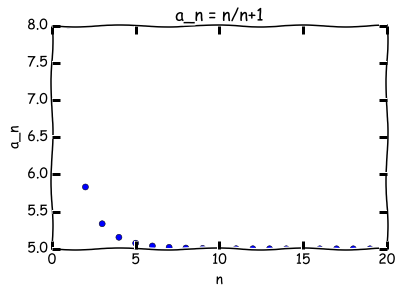

In [53]:
N = 20 # The number of terms we'll plot in the sequence
plt.xkcd() # I love this XKCD style!
n = np.linspace(1, N, N) # The array of N numbers 1, ..., N.
ax = pylab.axes()
ax.plot(n, a(n), 'o')
ax.set_title('a_n = n/n+1')
ax.set_xlabel('n')
ax.set_ylabel('a_n')

So, looks to be converging to 5!

Try to *prove* that it converges to 5. Hint: Take logarithms of both sides.

### 11.1 Number 83

Let's try to code in the Fibonacci sequence $a_1 = 1, a_2 = 1, a_{n+2} = a_{n+1} + a_n$.

In [54]:
def f(n):
    if n==1:
        return 1
    elif n==2:
        return 1
    elif n>=3:
        return f(n-1) + f(n-2)

Let's see if that works.

In [55]:
print(f(1), ",", f(2), ",", f(3), ",", f(4))

1 , 1 , 2 , 3


Now we can define the ratio of successive terms $a_n = \frac{f_{n+1}}{f_{n}}$.

In [56]:
def a(n):
    return f(n+1)/f(n)

Let's plot that in a table.

In [57]:
for n in range(1,11):
    print("| \t a_%d \t | \t %s \t |" % (n, format(a(n), ".7f")))

| 	 a_1 	 | 	 1.0000000 	 |
| 	 a_2 	 | 	 2.0000000 	 |
| 	 a_3 	 | 	 1.5000000 	 |
| 	 a_4 	 | 	 1.6666667 	 |
| 	 a_5 	 | 	 1.6000000 	 |
| 	 a_6 	 | 	 1.6250000 	 |
| 	 a_7 	 | 	 1.6153846 	 |
| 	 a_8 	 | 	 1.6190476 	 |
| 	 a_9 	 | 	 1.6176471 	 |
| 	 a_10 	 | 	 1.6181818 	 |


Seems to converge to about $1.618$ or so. Can you prove this?

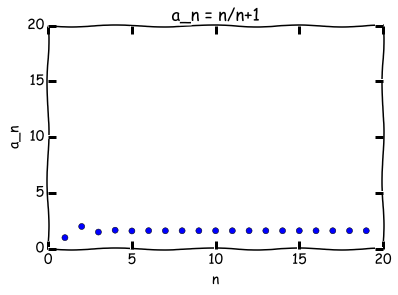

In [58]:
N = 20 # The number of terms we'll plot in the sequence
plt.xkcd() # I love this XKCD style!
n = np.linspace(1, N, N) # The array of N numbers 1, ..., N.
my_a_array = np.linspace(1, N, N) # Make an array
for i in range(0, N-1):
    my_a_array[i] = a(i+1)
ax = pylab.axes()
ax.plot(n, my_a_array, 'o')
ax.set_title('a_n = n/n+1')
ax.set_xlabel('n')
ax.set_ylabel('a_n')

### 11.2 Number 65

We're going to need a "Computer Algebra System" to do this. That's what SymPy is.


In [71]:
from sympy import *
init_printing()

In [72]:
n = Symbol("n")
i = Symbol("i")

First we enter the formula for the $nth$ term.

In [81]:
formula = (3*n**2 + 3*n + 1)/((n**2 + n)**3)

Here's how we do a partial fraction decomposition:

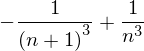

In [83]:
apart(formula)

Good! So we have 

$s_n = 1 - \frac{1}{(n+1)^3}$. 

Hence the sum evaluates as 1.

Let's check that by getting SymPy to compute the sum of the series directly.

In [87]:
S = Sum( formula, (n, 1, oo))

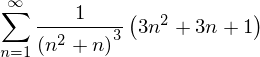

In [88]:
S

To evaluate this sum, we just do it!

In [89]:
S.doit()

Hooray!